# Referências a objetos, mutabilidade e reciclagem

Parte IV - Práticas de orientação a objetos | Capítulo 8 - Python Fluente - Luciano Ramalho


## Variáveis não são caixas, são rótulos

A variável é atribuída a um objeto. O objeto é criado antes da atribuição.

In [1]:
a = [1, 2, 3, 4]

In [2]:
b = a

In [3]:
a.append(23)

In [4]:
b

[1, 2, 3, 4, 23]

In [5]:
a

[1, 2, 3, 4, 23]

In [6]:
class Variavel:
    def __init__(self):
        print(f'Variável ID: {id(self)}')

In [7]:
x = Variavel()

Variável ID: 140008243834832


In [9]:
y = Variavel() * 10

Variável ID: 140009063438896


TypeError: ignored

Apelidos (aliases) são vários rótulos atribuídos a uma mesma variável.

O apelidamento (aliansing) nos trás que apesar de objetos associados terem o mesmo valor, eles podem ter identidades diferentes.

**id()** devolve o endereço de memória do objeto, é número e único, além de não sofrer alterações durante o tempo de vida do objeto.

> "Todo objeto tem uma identidade, um tipo e um valor. A identidade de um objeto não muda depois que esse objeto é criado; você pode pensar nela como o endereço do objeto na memória. O operador is compara a identidade de dois objetos; a função id() devolve um inteiro que representa a identidade do objeto."

In [11]:
mariana = {'name': 'Mariana', 'born': 1996}

In [13]:
mari = mariana

In [14]:
mari is mariana

True

In [15]:
id(mari), id(mariana)

(140008243414400, 140008243414400)

In [16]:
mari['born'] = 2000

In [17]:
mariana

{'name': 'Mariana', 'born': 2000}

In [18]:
mareh = {'name': 'Mariana', 'born': 2000}

In [19]:
mareh == mari

True

In [20]:
mareh == mariana

True

In [21]:
mareh is not mari

True

**==** compara valores de objetos, os dados que eles armazenam.

**is** compara as identidades.



## Relativa imutabilidade das tuplas

Tuplas armazenam referências a objetos, e pode não ser imutavél quando existem valores mutáveis referenciado. Apesar disso, a identidade dos itens que a compões, nunca muda.

In [22]:
tupla1 = (1, 2, [3, 4])

In [23]:
tupla2 = (1, 2, [3, 4])

In [24]:
tupla1 == tupla2

True

In [25]:
id(tupla1[-1])

140008242446528

In [26]:
tupla1[-1].append(5)

In [27]:
tupla1

(1, 2, [3, 4, 5])

In [28]:
id(tupla1[-1])

140008242446528

In [29]:
tupla1 == tupla2

False

## Cópias são rasas por padrão

Uma maneira simples de fazer uma **cópia rasa (shallow copy)** de uma lista é usar o construtor embutido **list()** ([:] também). De forma com que existam cópias igual e objetos diferentes.

Esse processo economiza memória de forma com que a coleção mais externa é duplicada, mas a cópia é preenchida com referências aos mesmos itens armazenados na coleção original, que podem ser imutáveis ou mutáveis.

In [30]:
lista1 = [1, [2,3], (4,5)]

In [31]:
lista2 = list(lista1)

In [32]:
lista2

[1, [2, 3], (4, 5)]

In [34]:
lista2 == lista1

True

In [35]:
lista2 is lista1

False

In [36]:
lista3 = lista1[:]

In [37]:
lista3 == lista1

True

In [38]:
lista3 is lista1

False

In [39]:
lista1.append(100)
lista1[1].remove(3) # Altera lista in-place
print(f'Lista 1: {lista1}')
print(f'Lista 2: {lista2}')
print(f'Lista 3: {lista3}')

Lista 1: [1, [2], (4, 5), 100]
Lista 2: [1, [2], (4, 5)]
Lista 3: [1, [2], (4, 5)]


In [40]:
lista2[1] += [10, 11]
lista2[2] += (20, 21)
print(f'Lista 1: {lista1}')
print(f'Lista 2: {lista2}')
print(f'Lista 3: {lista3}')

Lista 1: [1, [2, 10, 11], (4, 5), 100]
Lista 2: [1, [2, 10, 11], (4, 5, 20, 21)]
Lista 3: [1, [2, 10, 11], (4, 5)]


[Python Tutor](https://pythontutor.com/visualize.html#code=lista1%20%3D%20%5B1,%20%5B2,3%5D,%20%284,5%29%5D%0Alista2%20%3D%20list%28lista1%29%0Alista1.append%28100%29%0Alista1%5B1%5D.remove%283%29%20%23%20Altera%20lista%20in-place%0Aprint%28f'Lista%201%3A%20%7Blista1%7D'%29%0Aprint%28f'Lista%202%3A%20%7Blista2%7D'%29%0Alista2%5B1%5D%20%2B%3D%20%5B10,%2011%5D%0Alista2%5B2%5D%20%2B%3D%20%2820,%2021%29%0Aprint%28f'Lista%201%3A%20%7Blista1%7D'%29%0Aprint%28f'Lista%202%3A%20%7Blista2%7D'%29&cumulative=false&curInstr=10&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

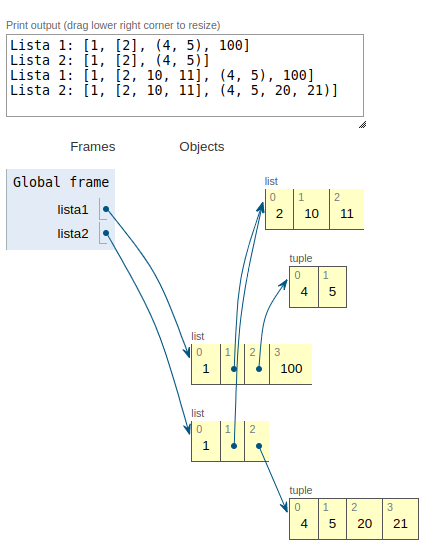

## Cópias de objetos quaisquer (rasas ou profundas)

Resumindo:

**cópias rasas:** preenchida com referências aos mesmos itens armazenados na coleção original, referenciando aos seus objetos.

**cópias profundas:** duplicatas que não compartilhem referências aos objetos incluídos.

A biblioteca copy pode ser utilizada e também controlada seu comportamento com a implementação dos métodos especiais `__copy__()` e `__deepcopy__()`.

In [61]:
class Bus:
    def __init__(self, passengers=None):
        if passengers is None:
            self.passengers = []
        else:
            self.passengers = list(passengers)

    def pick(self, name):
        self.passengers.append(name)

    def drop(self, name):
        self.passengers.remove(name)

In [42]:
import copy

In [62]:
bus1 = Bus(['Mariana', 'Lucas', 'Ana Clara', 'Dani'])

In [63]:
# Cópia rasa
bus2 = copy.copy(bus1)

In [64]:
# Cópia profunda
bus3 = copy.deepcopy(bus1)

In [65]:
id(bus1), id(bus2), id(bus3)

(140008243833872, 140008243832576, 140008243831472)

In [66]:
bus1.drop('Dani')

In [67]:
bus2.passengers

['Mariana', 'Lucas', 'Ana Clara']

In [68]:
bus3.passengers

['Mariana', 'Lucas', 'Ana Clara', 'Dani']

A função deepcopy lembra os objetos já copiados para tratar referências cíclicas de modo elegante. Mas, uma cópia profunda pode ser profunda demais em alguns casos. Por exemplo, podem fazer referência a recursos externos que não deveriam ser copiados.

In [69]:
a = [23, 24]

In [70]:
b = [a, 25]

In [71]:
a.append(b)

In [72]:
a

[23, 24, [[...], 25]]

In [74]:
c = copy.deepcopy(a)

In [75]:
c

[23, 24, [[...], 25]]

## Parâmetros de função como referências

O único modo de passa parâmetros em Python é a **chamada por compartilhamento** (call by sharing), no qual cada parâmetro formal da função obtém uma cópia de cada referência nos argumentos.

Uma função pode alterar qualquer objeto mutável passado como parâmetro, mas não poderá mudar a identidade desses objetos.

In [1]:
def f(a, b):
    a += b
    return a

In [2]:
x = 1
y = 2

f(x, y)

3

In [3]:
x, y

(1, 2)

In [4]:
a = [1, 2]
b = [3, 4]

f(a, b)

[1, 2, 3, 4]

In [5]:
a, b

([1, 2, 3, 4], [3, 4])

Os argumentos passados são afetados de modos diferentes.

In [6]:
t = (1, 2)
u = (3, 4)

f(t, u)

(1, 2, 3, 4)

In [7]:
t, u

((1, 2), (3, 4))

### Tipos mutáveis como default de parâmetros não é uma boa ideia

In [15]:
class HauntedBus:
    """Um modelo de ônibus assombrado por passageiros fantasmas"""

    def __init__(self, passengers=[]):
        self.passengers = passengers

    def pick(self, name):
        self.passengers.append(name)
    
    def drop(self, name):
        self.passengers.remove(name)


A implementação dos métodos remove e append estão mudando a lista default. Todas as instâncias de HautedBus que não receberem uma lista inicial de passageiros, vão compartilhar uma mesma lista de passageiros entre si.

Ou seja, se um valor default em um parâmetro for um objeto mutável e sofrer alteração, a mudança vai afetar todas as chamadas da mesma função.

In [16]:
bus1 = HauntedBus(['Mari', 'Lucas'])

In [17]:
bus1.passengers

['Mari', 'Lucas']

In [18]:
bus1.pick('Ana')

In [19]:
bus1.drop('Lucas')

In [20]:
bus1.passengers

['Mari', 'Ana']

In [21]:
bus2 = HauntedBus()

In [22]:
bus2.pick('Lucas')

In [23]:
bus2.passengers

['Lucas']

In [24]:
bus3 = HauntedBus()

In [25]:
bus3.passengers

['Lucas']

In [26]:
bus3.pick('Mari')

In [27]:
bus2.passengers

['Lucas', 'Mari']

In [28]:
bus2.passengers is bus3.passengers

True

In [29]:
dir(HauntedBus.__init__)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [30]:
HauntedBus.__init__.__defaults__

(['Lucas', 'Mari'],)

### Programação defensiva com parâmetros mutáveis

Ao escrever uma função que receba um parâmetro mutável, você deve considerar cuidadosamente se quem a chama espera que o argumento passado seja alterado.

Principle of least astronishment (princípio da mínima surpresa), é uma prática no design de interfaces, o qual a implementação abaixo viola.

In [31]:
class TwilighBus:
    """Um modelo de ônibus que faz os passageiros desaparecerem"""

    def __init__(self, passengers=None):
        if passengers is None:
            self.passengers = []
        else:
            self.passengers = passengers

    def pick(self, name):
        self.passengers.append(name)
    
    def drop(self, name):
        self.passengers.remove(name)


In [32]:
chess_team = ['Mari', 'Lucas', 'Rioja']

bus = TwilighBus(chess_team)

In [33]:
bus.drop('Rioja')

In [34]:
bus.drop('Lucas')

In [35]:
chess_team

['Mari']

Quando os métodos remove e append são usados com o self.passengers, existe atualização da lista original recebida como argumento do construtor.

In [36]:
class TwilighBus:
    """Um modelo de ônibus que faz os passageiros desaparecerem"""

    def __init__(self, passengers=None):
        if passengers is None:
            self.passengers = []
        else:
            self.passengers = list(passengers) # Fazendo uma cópia

    def pick(self, name):
        self.passengers.append(name)
    
    def drop(self, name):
        self.passengers.remove(name)


In [37]:
chess_team = ['Mari', 'Lucas', 'Rioja']

bus = TwilighBus(chess_team)

In [38]:
bus.drop('Rioja')

In [39]:
bus.drop('Lucas')

In [40]:
chess_team

['Mari', 'Lucas', 'Rioja']

## del e coleta de lixo

**del** apaga nomes e não objetos.

Cada objeto mantém um contador para o número de referências a ele, assim que esse número chega a zero, é imediatamente destruído, liberando a memória alocada.

Um algoritmo de generation garbage collection foi implementadora para os casos de objetos envolvidos em referências ciclícas.

In [42]:
import weakref

s1 = {1, 2, 3}
s2 = s1

def bye():
    print('Gone with the wind...')

In [43]:
ender = weakref.finalize(s1, bye)

In [44]:
ender.alive

True

In [45]:
del s1

In [46]:
s2 = 'spam'

In [47]:
ender.alive

False

## Referências fracas

A presença de referências é o que mantém um objeto vivo na memória. Se não houver referências, o coletor de lixo destruirá o objeto.

É conveniente ter uma referência a um objeto que não o mantenha por mais tempo que o necessário, como os caches.

**Referências fracas a um objeto não incrementam o seu contador.** Sendo então, uma boa opção na referenciação do cache.



A instância [weakref.ref](https://docs.python.org/3/library/weakref.html) pode ser chamada para acessar seu referente. Se o obj. estiver vivo, chamar a ref. fraca devolve esse objeto; se não, None.



In [1]:
import weakref

a_set = {0, 1}
wref = weakref.ref(a_set)

In [2]:
wref

<weakref at 0x7f25fd92b400; to 'set' at 0x7f25e2b95900>

In [3]:
wref()

{0, 1}

In [4]:
a_set = {2, 3, 4}

In [5]:
wref()

{0, 1}

In [6]:
wref() is None

False